# **REAL DATA ANALYSIS**
---
Social Network Analysis Course - **2021**

Applied Computational Intelligence M.Sc. I
***
Team members:
* Emanuel Bîscă
* Denisa Buzan
* Răzvan Crăciun
* Ciprian Cuc

---


In [ ]:
%%html
<marquee style='width: 100%; color: green;'><b>Collaborations Network</b></marquee>

In [ ]:
! pip install pandas numpy

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!pip install bokeh

In [ ]:
!pip install dimcli networkx pyvis -U --quiet

In [ ]:
import numpy as np
import pygraphviz as pgv
import pandas as pd
import networkx as nx
import pygraphviz as pgv
from dimcli.core.extras import NetworkViz
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import networkx as nx

# This example needs Graphviz and either PyGraphviz or pydot
# from networkx.drawing.nx_pydot import graphviz_layout
from networkx.drawing.nx_agraph import graphviz_layout


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading data**
## The preprocessing step

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/SNA_project_2/metadata.csv')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


cord_uid  ...        s2_id
0       ug7v899j  ...          NaN
1       02tnwd4m  ...          NaN
2       ejv2xln0  ...          NaN
3       2b73a28n  ...          NaN
4       9785vg6d  ...          NaN
...          ...  ...          ...
529646  cquuqbt3  ...  220698523.0
529647  qhu1k7vb  ...  222172411.0
529648  woademzv  ...  232130244.0
529649  i5vw5kjs  ...  220526922.0
529650  lf4vlpb5  ...  221720259.0

[529651 rows x 19 columns]

In [ ]:
data = data.drop_duplicates(subset=['abstract'])
data = data[data['publish_time'].astype(str).str.contains("2020-03-13")]
data = data['authors'].dropna()
data

4652      Vetrugno, Luigi; Guadagnin, Giovanni Maria; Br...
4653      Vetrugno, Luigi; Brussa, Alessandro; Guadagnin...
4658      Valentini, Diletta; Di Camillo, Chiara; Mirant...
4664                Li, Chao; Chen, Jing-Yi; Huang, Yang-Mu
5938      Zhang, Xiaoning; Zhang, Zhiqiang; Ju, Mingyan;...
                                ...                        
511409    Ji, Weiping; Bishnu, Gautam; Cai, Zhenzhai; Sh...
516387    Krichel, Boris; Falke, Sven; Hilgenfeld, Rolf;...
518304                                Stein, Richard Albert
522246                    Rehwinkel, Jan; Gack, Michaela U.
523615    Lei, Yu; lan, yunping; lu, jianli; huang, xiao...
Name: authors, Length: 180, dtype: object

## **Creating a dictionary; writing it to a file**

In [ ]:
collaborations = {}

# adding collaborations from the author list to the dictionary
def collaborations_from_list(authors_list):
    for i in range(len(authors_list)):
        for j in range(i + 1, len(authors_list)):
            key = sorted( (authors_list[i], authors_list[j]) )
            key = '; '.join(key)
            if key in collaborations.keys():
                collaborations[key] += 1
            else:
                collaborations[key] = 1
            


for authors in data.values:
    authors_list = authors.split('; ')
    collaborations_from_list(authors_list)

del data
print(len(collaborations.keys()))

4590


In [ ]:
with open('collaborations.txt', 'w') as f:
    for key in collaborations.keys():
        f.write(key + f"; {collaborations[key]}\n")
        
del collaborations

# **Creating the graph**
## Extracting meaningful information about our network

In [ ]:
G = nx.Graph()

with open('collaborations.txt', 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        auth1, auth2, count = line.split('; ')
        G.add_edge(auth1, auth2, weight=int(count))


In [ ]:
G.nodes

NodeView(('Guadagnin, Giovanni Maria', 'Vetrugno, Luigi', 'Brussa, Alessandro', 'Orso, Daniele', 'Garofalo, Eugenio', 'Bruni, Andrea', 'Longhini, Federico', 'Bove, Tiziana', 'De Lorenzo, Francesco', 'Cammarota, Gianmaria', 'Santangelo, Erminio', 'Di Camillo, Chiara', 'Valentini, Diletta', 'Mirante, Nadia', 'Marcellini, Valentina', 'Carsetti, Rita', 'Villani, Alberto', 'Chen, Jing-Yi', 'Li, Chao', 'Huang, Yang-Mu', 'Zhang, Xiaoning', 'Zhang, Zhiqiang', 'Ju, Mingyan', 'Li, Jiaci', 'Jing, Yaqing', 'Zhao, Yuxia', 'Gu, Chao', 'Dong, Ming', 'Li, Guang', 'Liu, Yi', 'Barros, Joana M', 'Duggan, Jim', 'Rebholz-Schuhmann, Dietrich', 'Albert, Marisa S.', 'Kipps, Alaina K.', 'Bomher, Sean', 'Cheung, Shirley', 'Feehan, Shannon', 'Kim, Joseph', 'Elmassry, Moamen M.', 'Mudaliar, Nithya S.', 'Colmer-Hamood, Jane A.', 'San Francisco, Michael J.', 'Griswold, John A.', 'Dissanaike, Sharmila', 'Hamood, Abdul N.', 'Anderson, Martha', 'Youngner, Stuart', 'Smith, Regina Dunne', 'Nandyal, Raja R.', 'Orlowski, 

In [ ]:
G.edges

EdgeView([('Guadagnin, Giovanni Maria', 'Vetrugno, Luigi'), ('Guadagnin, Giovanni Maria', 'Brussa, Alessandro'), ('Guadagnin, Giovanni Maria', 'Orso, Daniele'), ('Guadagnin, Giovanni Maria', 'Garofalo, Eugenio'), ('Guadagnin, Giovanni Maria', 'Bruni, Andrea'), ('Guadagnin, Giovanni Maria', 'Longhini, Federico'), ('Guadagnin, Giovanni Maria', 'Bove, Tiziana'), ('Guadagnin, Giovanni Maria', 'De Lorenzo, Francesco'), ('Guadagnin, Giovanni Maria', 'Cammarota, Gianmaria'), ('Guadagnin, Giovanni Maria', 'Santangelo, Erminio'), ('Vetrugno, Luigi', 'Brussa, Alessandro'), ('Vetrugno, Luigi', 'Orso, Daniele'), ('Vetrugno, Luigi', 'Garofalo, Eugenio'), ('Vetrugno, Luigi', 'Bruni, Andrea'), ('Vetrugno, Luigi', 'Longhini, Federico'), ('Vetrugno, Luigi', 'Bove, Tiziana'), ('Vetrugno, Luigi', 'De Lorenzo, Francesco'), ('Vetrugno, Luigi', 'Cammarota, Gianmaria'), ('Vetrugno, Luigi', 'Santangelo, Erminio'), ('Brussa, Alessandro', 'Orso, Daniele'), ('Brussa, Alessandro', 'Garofalo, Eugenio'), ('Brussa, 

In [ ]:
nx.number_of_nodes(G)

955

In [ ]:
nx.number_connected_components(G)

150

In [ ]:
nx.number_of_edges(G)

4590

# **Network properties**

*   The average degree is 9.612565445026178;
*   There are 150 connected component in our collaborations network;
*   The largest component has 43 nodes and 603 links;
*   The diameter (for the largest path) is equal to 6;
*   Average clustering coefficient:
      * Avg clustering coefficient: 9.612565445026178;
      * Avg clustering coefficient for the largest component: 28.046511627906977.

In [ ]:

def properties_network(G):
  N = len(G)
  L = G.size()
  degrees = [G.degree[node] for node in G]
  kmin = np.min(degrees)
  kmax = np.max(degrees)
  kavg = np.mean(degrees)
  print("N=", N)
  print("L=", L)
  print(f'Average degree = {kavg}. \nMin degree: {kmin}. \nMax degree: {kmax}')
  return N,L,degrees,kmin,kmax,kavg
  
N,L,degrees,kmin,kmax,kavg=properties_network(G)

N= 955
L= 4590
Average degree = 9.612565445026178. 
Min degree: 1. 
Max degree: 42


# **Check if the network is connected**

In [ ]:
print("Is the network connected:",nx.is_connected(G))

Is the network connected: False


# **Properties of the largest component**

In [ ]:
sorted_components=sorted(nx.connected_components(G), key=len, reverse=True)
G0=G.subgraph(sorted_components[0])
print("Diameter of the largest component=",nx.diameter(G0))



Diameter of the largest component= 2


In [ ]:
N0,L0,degrees0,kmin0,kmax0,kavg0=properties_network(G0)

N= 43
L= 603
Average degree = 28.046511627906977. 
Min degree: 12. 
Max degree: 42


In [ ]:
sorted_components;
sizes=[]
for s in sorted_components:
  sizes.append(len(s))

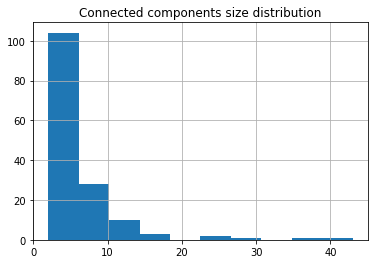

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sizes, bins=10)
plt.grid(True)
plt.title("Connected components size distribution")
plt.show()

## **Shortest path length for the largest component**


In [ ]:
nx.average_shortest_path_length(G0)

1.3322259136212624

## **Density for the largest component**

In [ ]:
density=nx.density(G)#  no of edges / maximum possible edges
print("Edge density in G =", density)
density0=nx.density(G0)#  no of edges / maximum possible edges
print("Edge density in G0 =", density0)

Edge density in G = 0.010076064407784253
Edge density in G0 = 0.6677740863787376


# **Analysis**

In the this section, we will compute and plot:
*   degree distribution
*   clustering coefficient distribution
*   betweenness centrality distribution
*   connected components size distribution

## **Degree distribution**

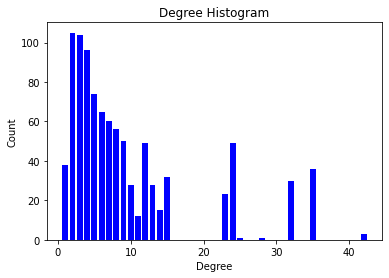

In [ ]:
import collections
def plot_degree_histogram(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # degree␣
  ,→sequence
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())
  plt.bar(deg, cnt, width=0.80, color="b")
  plt.title("Degree Histogram")
  plt.ylabel("Count")
  plt.xlabel("Degree")
  plt.show()
  return degreeCount

degreeCount=plot_degree_histogram(G)

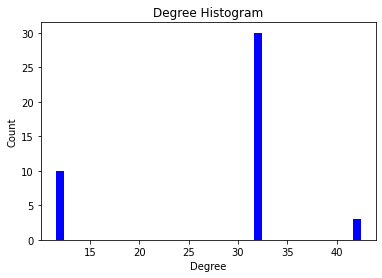

In [ ]:
degreeCount0=plot_degree_histogram(G0)

[0.         0.18036103 0.36072206 0.5410831  0.72144413 0.90180516
 1.08216619 1.26252723 1.44288826 1.62324929]
[ 1.23078024  1.86441054  2.82424638  4.27822492  6.4807407   9.81715567
 14.87122381 22.52722735 34.12469467]


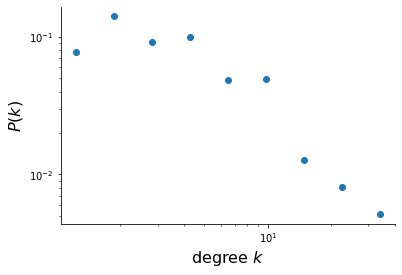

In [ ]:
def plot_degree_distribution(G,kmin,kmax,degrees):
  # numpy can be used to get logarithmically-spaced bins between the minimum and maximum degree
  # Get 10 logarithmically spaced bins between kmin and kmax
  bin_edges=np.logspace(np.log10(kmin),np.log10(kmax),num=10)
  # histogram the data into these bins
  density,_=np.histogram(degrees,bins=bin_edges,density=True)
  fig=plt.figure(figsize=(6,4))
  # "x" should be midpoint (IN LOG SPACE) of each bin
  log_be=np.log10(bin_edges)
  print(log_be)
  x=10**((log_be[1:]+log_be[:-1])/2)
  print(x)
  plt.loglog(x,density,marker='o',linestyle='none')
  plt.xlabel(r"degree $k$",fontsize=16)
  plt.ylabel(r"$P(k)$",fontsize=16)
  # remove right and top boundaries because they're ugly
  ax=plt.gca()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.yaxis.set_ticks_position('left')
  ax.xaxis.set_ticks_position('bottom')
  # Show the plot
  plt.show()

plot_degree_distribution(G,kmin,kmax,degrees)

[1.07918125 1.13963325 1.20008526 1.26053726 1.32098927 1.38144127
 1.44189328 1.50234528 1.56279729 1.62324929]
[12.8649247  14.78629115 16.99461218 19.53274423 22.44994432 25.80282596
 29.65645786 34.08562667 39.17628838]


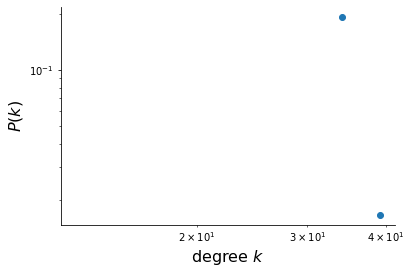

In [ ]:
plot_degree_distribution(G0,kmin0,kmax0,degrees0)

## **Clustering coefficients**

In [ ]:
avg_cc=nx.average_clustering(G)
print("Avg clustering coefficient:", avg_cc)
avg_cc0=nx.average_clustering(G0)
print("Avg clustering coefficient for the largest component:", avg_cc0)

Avg clustering coefficient: 0.9523549628764798
Avg clustering coefficient for the largest component: 0.9756907868082003


## **Clustering coefficient distribution**

In [ ]:
def compute_clustering_cleff(G):
  cc=nx.clustering(G)
  vcc=[]
  for n in G.nodes():
    vcc.append(nx.clustering(G, n))
  vcc=np.array(vcc)# vcc can also be obtained from cc.values()
  plt.hist(cc.values(), bins=10, density=True)
  plt.grid(True)
  plt.title("Distribution of the clustering coefficient")
  plt.xlabel("Clustering coefficient (cc)")
  plt.ylabel("P(cc)")
  plt.show()

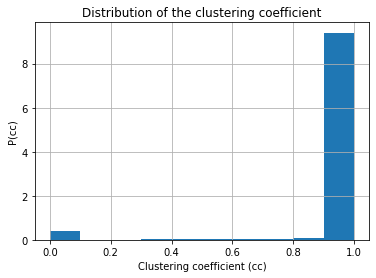

In [ ]:
compute_clustering_cleff(G)

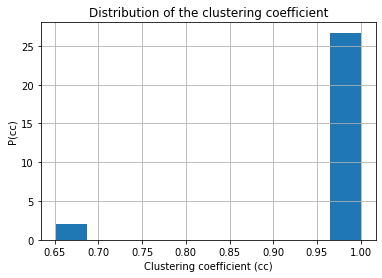

In [ ]:
compute_clustering_cleff(G0)

In [ ]:
def compute_clustering_cleff_degree(G,degreeCount):
  ck = []
  ks = []
  for node_degree in degreeCount.keys():
    ks.append(node_degree) # this will contain the degrees of the node
    #print("Nodes with degree ", node_degree, " are: ")
    nodes = [n for n, d in G.degree() if d == node_degree]
    #print(nodes)
    local_cc = 0
    for n in nodes:
      local_cc += nx.clustering(G, n)
    ck.append(local_cc/len(nodes)) # this is the average clustering coefficient␣
    ,→for all nodes that have degree node_degree
  print(ck)
  print(len(ck))
  print(ks)
  print(len(ks))
  plt.loglog(ks, ck, 'bo', color='#c7502c')
  plt.title("Clustering coefficient according to degree")
  plt.ylabel("C(k)")
  plt.xlabel("k")
  plt.show()

[0.6515679442508711, 1.0, 1.0, 0.746031746031746, 0.8466666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9468253968253969, 1.0, 0.9840561224489797, 1.0, 0.9876923076923078, 0.9837837837837837, 1.0, 0.9935897435897435, 0.9904761904761905, 0.0]
22
[42, 35, 32, 28, 25, 24, 23, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
22


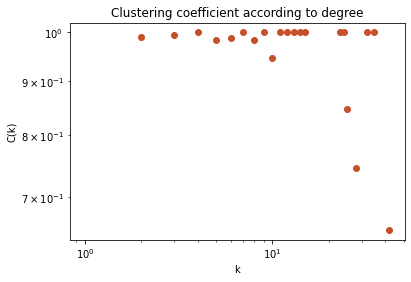

In [ ]:
compute_clustering_cleff_degree(G,degreeCount)

[0.6515679442508711, 1.0, 1.0]
3
[42, 32, 12]
3


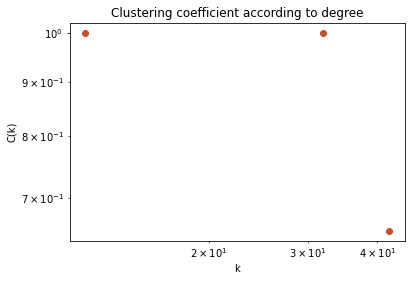

In [ ]:
compute_clustering_cleff_degree(G0,degreeCount0)

## **Degree centrality**

Degree centrality shows Popularity -  the fraction of nodes it is connected to (actual no of neighbours / n-1 )

 To determine the degree centrality, the degree of a node is divided by the number of other nodes in the network (n-1). 

In [ ]:
degree_centrality=nx.degree_centrality(G)

In [ ]:
degree_centrality

{'Abate, Alessandro': 0.0020964360587002098,
 'Abe, Koji': 0.0041928721174004195,
 'Abi Jaoude, Joseph': 0.009433962264150945,
 'Abiona, Olubukola': 0.007337526205450734,
 'Adib, Elio': 0.009433962264150945,
 'Afzal, Mohammad': 0.009433962264150945,
 'Ahmad, Tauseef': 0.02410901467505241,
 'Ahmed, Daniele': 0.0020964360587002098,
 'Ahmed, Kamran': 0.006289308176100629,
 'Akgul, Erol': 0.008385744234800839,
 'Akl, Elie W': 0.009433962264150945,
 'Akshay, S.': 0.0031446540880503146,
 'Albert, Marisa S.': 0.005241090146750524,
 'Aldhaleei, Wafa Ali': 0.0041928721174004195,
 'Ali, Usman': 0.0031446540880503146,
 'Almaawi, Alyas': 0.005241090146750524,
 'Almeida, Bernardo': 0.0020964360587002098,
 'Alvarado-Arnez, Lucia Elena': 0.02410901467505241,
 'Alwalid, Osamah': 0.014675052410901468,
 'Amery, Khaled': 0.008385744234800839,
 'An, Jie': 0.0041928721174004195,
 'Anderson, Martha': 0.006289308176100629,
 'Angluin, Dana': 0.0020964360587002098,
 'Anjorin, Anthony': 0.0010482180293501049,
 

In [ ]:
degree_centrality0=nx.degree_centrality(G0)

In [ ]:
degree_centrality0

{'Baguelin, Marc': 0.7619047619047619,
 'Bhatia, Sangeeta': 0.7619047619047619,
 'Boonyasiri, Adhiratha': 0.7619047619047619,
 'Chen, Wei': 0.2857142857142857,
 'Chen, Yingying': 0.2857142857142857,
 'Cori, Anne': 0.7619047619047619,
 'Cucunuba, Zulma M': 0.7619047619047619,
 'Cuomo-Dannenburg, Gina': 0.7619047619047619,
 'Dighe, Amy': 0.7619047619047619,
 'Donnelly, Christl': 0.7619047619047619,
 'Dorigatti, Ilaria': 0.7619047619047619,
 'Ferguson, Neil': 0.7619047619047619,
 'Fitzjohn, Rich': 0.7619047619047619,
 'Fu, Han': 1.0,
 'Gaythorpe, Katy A M': 0.7619047619047619,
 'Ghani, Azra': 0.7619047619047619,
 'Green, Will': 0.7619047619047619,
 'Griffin, Jamie': 0.7619047619047619,
 'Hamlet, Arran': 0.7619047619047619,
 'Hinsley, Wes': 0.7619047619047619,
 'Imai, Natsuko': 0.7619047619047619,
 'Laydon, Daniel': 0.7619047619047619,
 'Li, Xinguang': 0.2857142857142857,
 'Liu, Dehui': 0.2857142857142857,
 'Nedjati-Gilani, Gemma': 0.7619047619047619,
 'Nie, Qing': 0.2857142857142857,
 'Ok

In [ ]:
print("Degree of node 'Abate, Alessandro' is: ",G.degree['Abate, Alessandro'])
print("Degree centrality of node 'Abate, Alessandro' is: ",degree_centrality['Abate, Alessandro'])


print("Degree of node 'Baguelin, Marc' is: ",G0.degree['Baguelin, Marc'])
print("Degree centrality of node 'Baguelin, Marc' is: ",degree_centrality0['Baguelin, Marc'])

Degree of node 'Abate, Alessandro' is:  2
Degree centrality of node 'Abate, Alessandro' is:  0.0020964360587002098
Degree of node 'Baguelin, Marc' is:  32
Degree centrality of node 'Baguelin, Marc' is:  0.7619047619047619


## **Betweenness centrality distribution**
Betweenness centrality - the sum of the fraction of all-pairs shortest paths that pass through a node



In [ ]:
betweenness_centrality=nx.betweenness_centrality(G)
betweenness_centrality0=nx.betweenness_centrality(G0)

# print("Betweenness centrality of 'Abate, Alessandro': ",betweenness_centrality['Abate, Alessandro'])

In [ ]:
nodes_by_betweenness_centrality = sorted(betweenness_centrality.items(),key=lambda x:x[1],reverse=True)[:]
top_10_nodes_by_betweenness_centrality = sorted(betweenness_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]

In [ ]:
nodes_by_betweenness_centrality

[('Fu, Han', 0.00021998279734524755),
 ('Volz, Erik', 0.00021998279734524755),
 ('Wang, Haowei', 0.00021998279734524755),
 ('Zheng, Junhua', 0.0002111834854514377),
 ('Nishiura, Hiroshi', 0.00010119208677881389),
 ('Visser, Willem', 4.1796731495597043e-05),
 ('Vojnar, Tomáš', 4.1796731495597043e-05),
 ('Willemse, Tim A. C.', 1.3198967840714856e-05),
 ('Katoen, Joost-Pieter', 1.3198967840714856e-05),
 ('Menezes, Rafael', 6.599483920357428e-06),
 ('Cordeiro, Lucas C.', 6.599483920357428e-06),
 ('Šoková, Veronika', 6.599483920357428e-06),
 ('Legay, Axel', 4.399655946904952e-06),
 ('Guadagnin, Giovanni Maria', 3.959690352214457e-06),
 ('Vetrugno, Luigi', 3.959690352214457e-06),
 ('Brussa, Alessandro', 3.959690352214457e-06),
 ('Orso, Daniele', 3.959690352214457e-06),
 ('Bove, Tiziana', 3.959690352214457e-06),
 ('Beyer, Dirk', 2.199827973452476e-06),
 ('Garofalo, Eugenio', 0.0),
 ('Bruni, Andrea', 0.0),
 ('Longhini, Federico', 0.0),
 ('De Lorenzo, Francesco', 0.0),
 ('Cammarota, Gianmaria',

In [ ]:
top_10_nodes_by_betweenness_centrality[:]

[('Fu, Han', 0.00021998279734524755),
 ('Volz, Erik', 0.00021998279734524755),
 ('Wang, Haowei', 0.00021998279734524755),
 ('Zheng, Junhua', 0.0002111834854514377),
 ('Nishiura, Hiroshi', 0.00010119208677881389),
 ('Visser, Willem', 4.1796731495597043e-05),
 ('Vojnar, Tomáš', 4.1796731495597043e-05),
 ('Willemse, Tim A. C.', 1.3198967840714856e-05),
 ('Katoen, Joost-Pieter', 1.3198967840714856e-05),
 ('Menezes, Rafael', 6.599483920357428e-06)]

For the largest component

In [ ]:
nodes_by_betweenness_centrality0 = sorted(betweenness_centrality0.items(),key=lambda x:x[1],reverse=True)[:]
top_10_nodes_by_betweenness_centrality0 = sorted(betweenness_centrality0.items(),key=lambda x:x[1],reverse=True)[0:10]

In [ ]:
def separate_tuples(top_10_nodes):
  nodes=[]
  values=[]
  for i in top_10_nodes:
    nodes.append(i[0])
    values.append((i[1]))
  return nodes, values


In [ ]:
nodes_by_betweeness,values_by_betweeness = separate_tuples(top_10_nodes_by_betweenness_centrality)
nodes_by_betweeness0,values_by_betweeness0 = separate_tuples(top_10_nodes_by_betweenness_centrality0)

In [ ]:
values_by_betweeness

[0.00021998279734524755,
 0.00021998279734524755,
 0.00021998279734524755,
 0.0002111834854514377,
 0.00010119208677881389,
 4.1796731495597043e-05,
 4.1796731495597043e-05,
 1.3198967840714856e-05,
 1.3198967840714856e-05,
 6.599483920357428e-06]

In [ ]:
def plot_betweness_centrality_for_top_10(values_by_betweeness):
  plt.scatter(range(10),values_by_betweeness,)
  plt.grid(True)
  plt.title("Betweenness centrality distribution for top 10 nodes")
  plt.xlabel("Nodes id  for top 10 nodes")
  plt.ylabel("Betweeness value for top 10 nodes")
  plt.show()



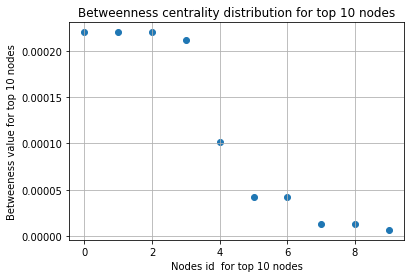

In [ ]:
plot_betweness_centrality_for_top_10(values_by_betweeness)

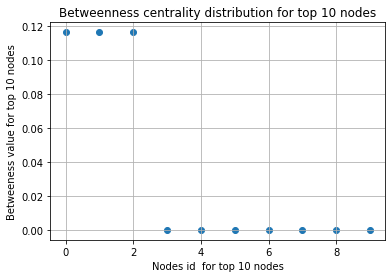

In [ ]:
plot_betweness_centrality_for_top_10(values_by_betweeness0)

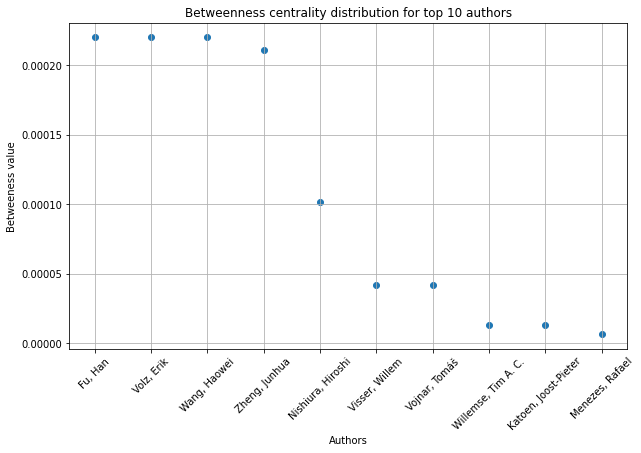

In [ ]:
def plot_betweness_distribution_top_10(nodes_by_betweeness,values_by_betweeness):
  # plt.scatter(nodes_by_betweeness,values_by_betweeness,)
  fig, ax = plt.subplots(figsize=(10, 6))

  # Define x and y axes
  ax.scatter(nodes_by_betweeness, 
          values_by_betweeness)
  plt.grid(True)
  plt.title("Betweenness centrality distribution for top 10 authors")
  plt.xlabel("Authors")
  plt.ylabel("Betweeness value")
  plt.setp(ax.get_xticklabels(), rotation = 45)
  plt.show()

plot_betweness_distribution_top_10(nodes_by_betweeness,values_by_betweeness)

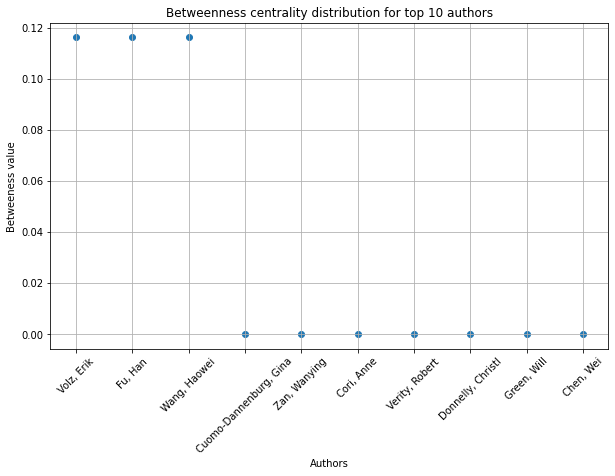

In [ ]:
plot_betweness_distribution_top_10(nodes_by_betweeness0,values_by_betweeness0)

In [ ]:
def plot_betweness_centrality_distribution(nodes_by_betweenness_centrality):
  nodes_by_betweeness_all_nodes, values_by_betweeness_all_nodes=separate_tuples(nodes_by_betweenness_centrality)
  # plt.scatter(nodes_by_betweeness_all_nodes,values_by_betweeness_all_nodes)
  fig, ax = plt.subplots()

  # Define x and y axes
  ax.scatter(nodes_by_betweeness_all_nodes, 
          values_by_betweeness_all_nodes)
  plt.title("Betweenness centrality distribution")
  plt.xlabel("Authors")
  plt.ylabel("Betweeness value")
  plt.setp(ax.get_xticklabels(), rotation = 50)
  plt.show()


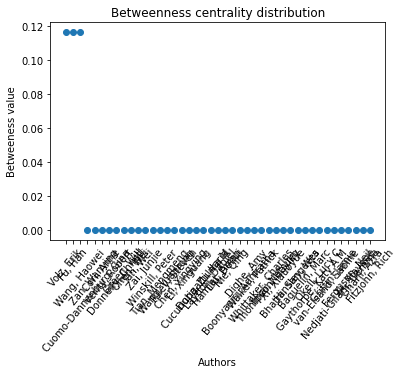

In [ ]:
plot_betweness_centrality_distribution(nodes_by_betweenness_centrality0)

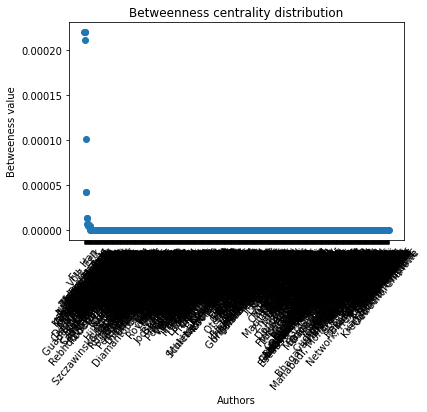

In [ ]:
plot_betweness_centrality_distribution(nodes_by_betweenness_centrality)

## **Closeness Centrality**

The reciprocal of the average shortest path distance to a node over all n-1 reachable nodes 

In [ ]:
closeness_centrality=nx.closeness_centrality(G)
closeness_centrality0=nx.closeness_centrality(G0)
print("Closeness centrality of 'Henckel, Ewa':",closeness_centrality['Henckel, Ewa'])

Closeness centrality of 'Henckel, Ewa': 0.006289308176100629


For the whole network

In [ ]:
nodes_by_closeness_centrality = sorted(closeness_centrality.items(),key=lambda x:x[1],reverse=True)[:]
top_10_nodes_by_closeness_centrality = sorted(closeness_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]

For the largest component

In [ ]:
nodes_by_closeness_centrality0 = sorted(closeness_centrality0.items(),key=lambda x:x[1],reverse=True)[:]
top_10_nodes_by_closeness_centrality0 = sorted(closeness_centrality0.items(),key=lambda x:x[1],reverse=True)[0:10]

In [ ]:
nodes_by_closeness,values_by_closeness = separate_tuples(top_10_nodes_by_closeness_centrality)
nodes_by_closeness0,values_by_closeness0 = separate_tuples(top_10_nodes_by_closeness_centrality0)

In [ ]:
def plot_closeness_centrality_for_top_10(values_by_closeness):
  plt.scatter(range(10),values_by_closeness,)
  plt.grid(True)
  plt.title("Closeness centrality distribution for top 10 nodes")
  plt.xlabel("Nodes id  for top 10 nodes")
  plt.ylabel("Closeness value for top 10 nodes")
  plt.show()



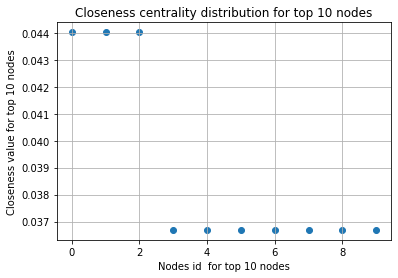

In [ ]:
  plot_closeness_centrality_for_top_10(values_by_closeness)

In [ ]:
values_by_closeness

In [ ]:
values_by_closeness0

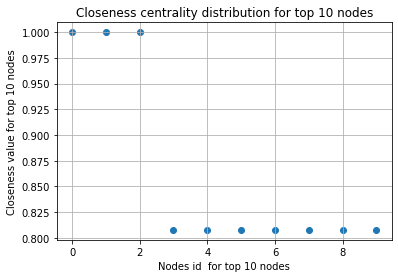

In [ ]:
plot_closeness_centrality_for_top_10(values_by_closeness0)

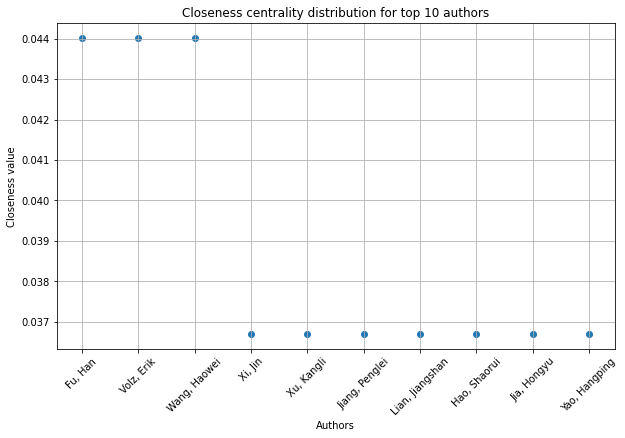

In [ ]:
def plot_closeness_distribution_top_10(nodes_by_closeness,values_by_closeness):
  # plt.scatter(nodes_by_betweeness,values_by_betweeness,)
  fig, ax = plt.subplots(figsize=(10, 6))

  # Define x and y axes
  ax.scatter(nodes_by_closeness, 
          values_by_closeness)
  plt.grid(True)
  plt.title("Closeness centrality distribution for top 10 authors")
  plt.xlabel("Authors")
  plt.ylabel("Closeness value")
  plt.setp(ax.get_xticklabels(), rotation = 45)
  plt.show()

plot_closeness_distribution_top_10(nodes_by_closeness,values_by_closeness)

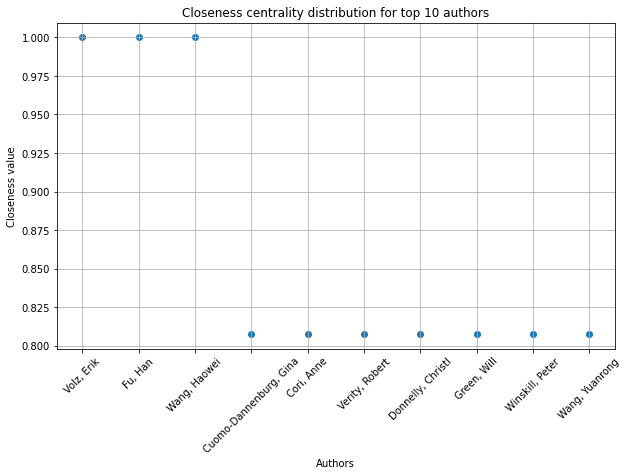

In [ ]:

plot_closeness_distribution_top_10(nodes_by_closeness0,values_by_closeness0)

## **Eigenvector centrality**
Influence of a node

The basic idea behind this metric revolves around a nodes neighbors and how connected they are. 

To score higher, a node needs to be well connected (high degree centrality) but it also needs to be connected to # others that are well connected

In [ ]:
eigen_centrality=nx.eigenvector_centrality(G)
eigen_centrality0=nx.eigenvector_centrality(G0)
print("Eigenvector centrality of 'Henckel, Ewa':",eigen_centrality['Henckel, Ewa'])

Eigenvector centrality of 'Henckel, Ewa': 1.4801613299533946e-55


For the whole network

In [ ]:
nodes_by_eigenvector_centrality = sorted(eigen_centrality.items(),key=lambda x:x[1],reverse=True)[:]
top_10_nodes_by_eigenvector_centrality = sorted(eigen_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]

For the largest component

In [ ]:
nodes_by_eigenvector_centrality0 = sorted(eigen_centrality0.items(),key=lambda x:x[1],reverse=True)[:]
top_10_nodes_by_eigenvector_centrality0 = sorted(eigen_centrality0.items(),key=lambda x:x[1],reverse=True)[0:10]

In [ ]:
nodes_by_eigenvector,values_by_eigenvector = separate_tuples(top_10_nodes_by_eigenvector_centrality)
nodes_by_eigenvector0,values_by_eigenvector0 = separate_tuples(top_10_nodes_by_eigenvector_centrality0)


In [ ]:
def plot_eigenvector_centrality_for_top_10(values_by_eigenvector):
  plt.scatter(range(10),values_by_eigenvector)
  plt.grid(True)
  plt.title("Eigenvector centrality distribution for top 10 nodes")
  plt.xlabel("Nodes id  for top 10 authors")
  plt.ylabel("Eigenvector value for top 10 authors")
  plt.show()

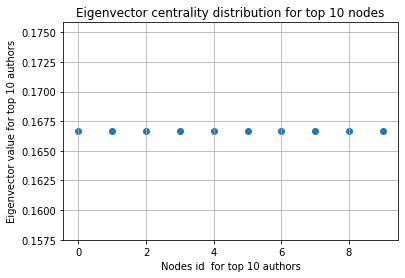

In [ ]:
plot_eigenvector_centrality_for_top_10(values_by_eigenvector)

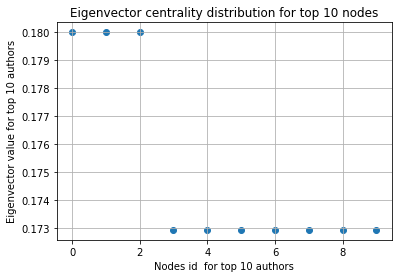

In [ ]:
plot_eigenvector_centrality_for_top_10(values_by_eigenvector0)

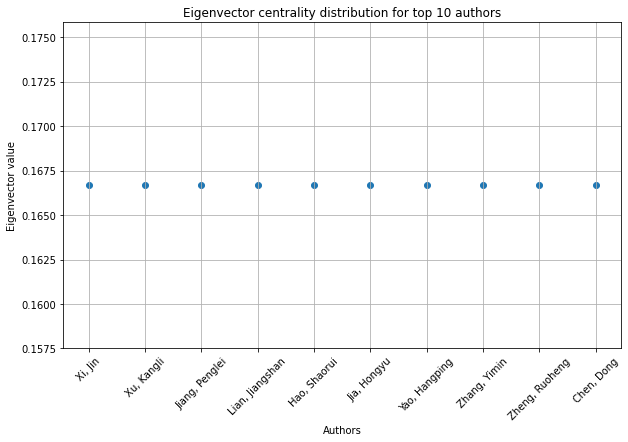

In [ ]:
def plot_eigenvector_distribution_top_10(nodes_by_eigenvector,values_by_eigenvector):
  # plt.scatter(nodes_by_betweeness,values_by_betweeness,)
  fig, ax = plt.subplots(figsize=(10, 6))

  # Define x and y axes
  ax.scatter(nodes_by_eigenvector, 
          values_by_eigenvector)
  plt.grid(True)
  plt.title("Eigenvector centrality distribution for top 10 authors")
  plt.xlabel("Authors")
  plt.ylabel("Eigenvector value")
  plt.setp(ax.get_xticklabels(), rotation = 45)
  plt.show()

plot_eigenvector_distribution_top_10(nodes_by_eigenvector,values_by_eigenvector)

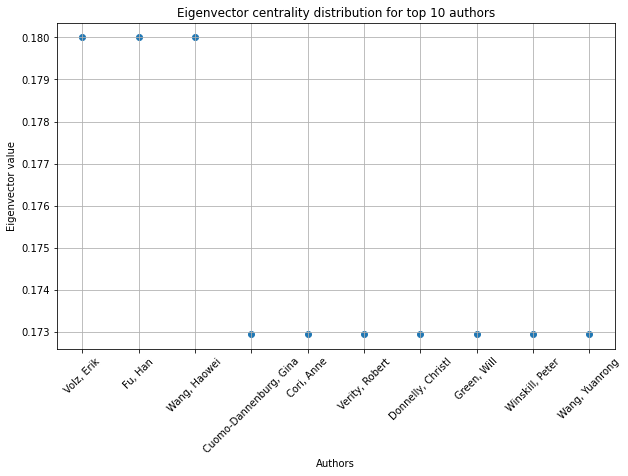

In [ ]:
plot_eigenvector_distribution_top_10(nodes_by_eigenvector0,values_by_eigenvector0)

# **Important nodes**


## **According to degree centrality**

In [ ]:
def get_top_5_acccording_to_degree(degree_centrality):
  dc_sorted=sorted(degree_centrality.items(),key=lambda item:item[1],reverse=True)
  print("Most important 5 nodes according to degree centrality are:")
  for i in range(5):
    print(dc_sorted[i])

For the whole network 

In [ ]:
get_top_5_acccording_to_degree(degree_centrality)

Most important 5 nodes according to degree centrality are:
('Fu, Han', 0.04402515723270441)
('Volz, Erik', 0.04402515723270441)
('Wang, Haowei', 0.04402515723270441)
('Xi, Jin', 0.03668763102725367)
('Xu, Kangli', 0.03668763102725367)


For the largest component:

In [ ]:
get_top_5_acccording_to_degree(degree_centrality0)

Most important 5 nodes according to degree centrality are:
('Volz, Erik', 1.0)
('Fu, Han', 1.0)
('Wang, Haowei', 1.0)
('Cuomo-Dannenburg, Gina', 0.7619047619047619)
('Cori, Anne', 0.7619047619047619)


## **According to betweenness centrality**

In [ ]:
def get_top_5_acccording_to_betweness(betweenness_centrality):
  bc_sorted=sorted(betweenness_centrality.items(),key=lambda item:item[1],reverse=True)
  print("Most important 5 nodes according to betweenness centrality are:")
  for i in range(5):
    print(bc_sorted[i])


For the whole network 

In [ ]:
get_top_5_acccording_to_betweness(betweenness_centrality)

Most important 5 nodes according to betweenness centrality are:
('Fu, Han', 0.00021998279734524755)
('Volz, Erik', 0.00021998279734524755)
('Wang, Haowei', 0.00021998279734524755)
('Zheng, Junhua', 0.0002111834854514377)
('Nishiura, Hiroshi', 0.00010119208677881389)


For the largest component:

In [ ]:
get_top_5_acccording_to_betweness(betweenness_centrality0)

Most important 5 nodes according to betweenness centrality are:
('Volz, Erik', 0.11614401858304306)
('Fu, Han', 0.11614401858304306)
('Wang, Haowei', 0.11614401858304306)
('Cuomo-Dannenburg, Gina', 0.0)
('Zan, Wanying', 0.0)


In [ ]:
def plot_betweness_degree(betweenness_centrality,degree_centrality):
  plt.scatter(list(betweenness_centrality.values()),list(degree_centrality.values()))
  plt.xlabel("Betweenness Centrality")
  plt.ylabel("Degree Centrality")
  plt.show()

###  **Degree centrality vs Betweenness centrality**

For the whole network

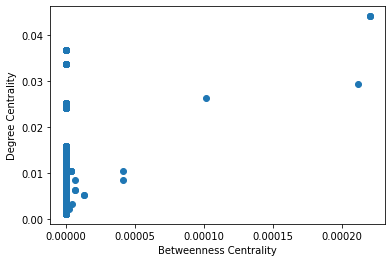

In [ ]:
plot_betweness_degree(betweenness_centrality,degree_centrality)

For the largest component

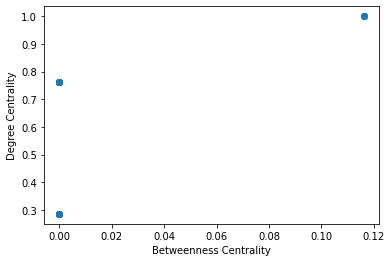

In [ ]:
plot_betweness_degree(betweenness_centrality0,degree_centrality0)

In [ ]:
def get_top_5_acccording_to_closeness_centrality(closeness_centrality):
  cc_sorted=sorted(closeness_centrality.items(),key=lambda item:item[1],reverse=True)
  print("Most important 5 nodes according to closeness centrality are:")
  for i in range(5):
    print(cc_sorted[i])
    

## **According to closeness centrality**

For the whole network

In [ ]:
get_top_5_acccording_to_closeness_centrality(closeness_centrality)

Most important 5 nodes according to closeness centrality are:
('Fu, Han', 0.0440251572327044)
('Volz, Erik', 0.0440251572327044)
('Wang, Haowei', 0.0440251572327044)
('Xi, Jin', 0.03668763102725367)
('Xu, Kangli', 0.03668763102725367)


For the largest component

In [ ]:
get_top_5_acccording_to_closeness_centrality(closeness_centrality0)

Most important 5 nodes according to closeness centrality are:
('Volz, Erik', 1.0)
('Fu, Han', 1.0)
('Wang, Haowei', 1.0)
('Cuomo-Dannenburg, Gina', 0.8076923076923077)
('Cori, Anne', 0.8076923076923077)


### **Degree centrality vs Closeness centrality**

In [ ]:
def plot_closness_degree(closeness_centrality,degree_centrality ):
  plt.scatter(list(closeness_centrality.values()),list(degree_centrality.values()))
  plt.xlabel("Closeness Centrality")
  plt.ylabel("Degree Centrality")
  plt.show()

For the whole network

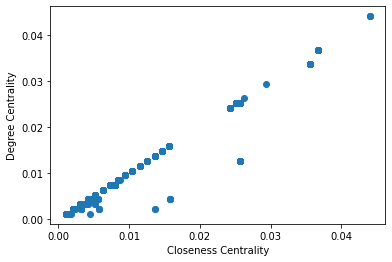

In [ ]:
plot_closness_degree(closeness_centrality,degree_centrality )

For the largest component

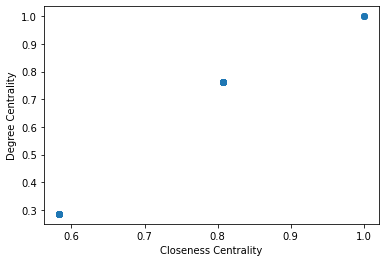

In [ ]:
plot_closness_degree(closeness_centrality0,degree_centrality0 )

## **According to eigenvector centrality**

In [ ]:
def get_top_5_acccording_to_eigenvector(eigen_centrality):
  ec_sorted=sorted(eigen_centrality.items(),key=lambda item:item[1],reverse=True)
  print("Most important 5 nodes according to eigenvector centrality are:")
  for i in range(5):
    print(ec_sorted[i])

For the whole network:

In [ ]:
get_top_5_acccording_to_eigenvector(eigen_centrality)

Most important 5 nodes according to eigenvector centrality are:
('Xi, Jin', 0.16666640626296628)
('Xu, Kangli', 0.16666640626296628)
('Jiang, Penglei', 0.16666640626296628)
('Lian, Jiangshan', 0.16666640626296628)
('Hao, Shaorui', 0.16666640626296628)


For the largest component:

In [ ]:
get_top_5_acccording_to_eigenvector(eigen_centrality0)

Most important 5 nodes according to eigenvector centrality are:
('Volz, Erik', 0.1800008251843376)
('Fu, Han', 0.1800008251843376)
('Wang, Haowei', 0.1800008251843376)
('Cuomo-Dannenburg, Gina', 0.17294937959892778)
('Cori, Anne', 0.17294937959892778)


### **Degree centrality vs Eigenvector centrality**

In [ ]:
def plot_eigenvector_degree(eigen_centrality,degree_centrality):
  plt.scatter(list(eigen_centrality.values()),list(degree_centrality.values()))
  plt.xlabel("Eigenvector Centrality")
  plt.ylabel("Degree Centrality")
  plt.show()


For the whole network

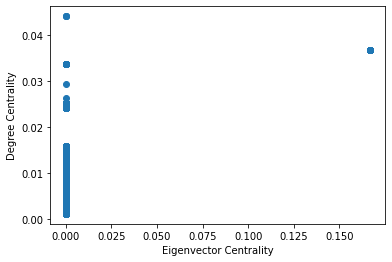

In [ ]:
plot_eigenvector_degree(eigen_centrality,degree_centrality)

For the largest component

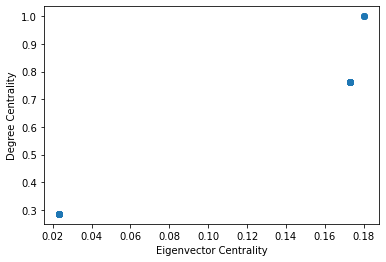

In [ ]:
plot_eigenvector_degree(eigen_centrality0,degree_centrality0)

#  **Visualization of the network**

For the whole network

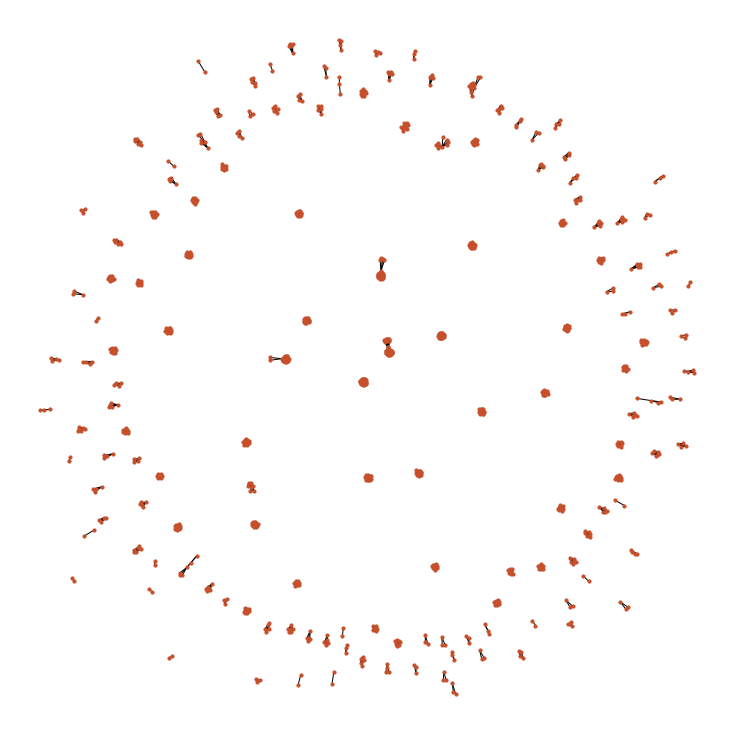

In [ ]:
fig=plt.figure(figsize=(10,10))
nx.draw_spring(G, node_size=10, node_color="#c7502c")

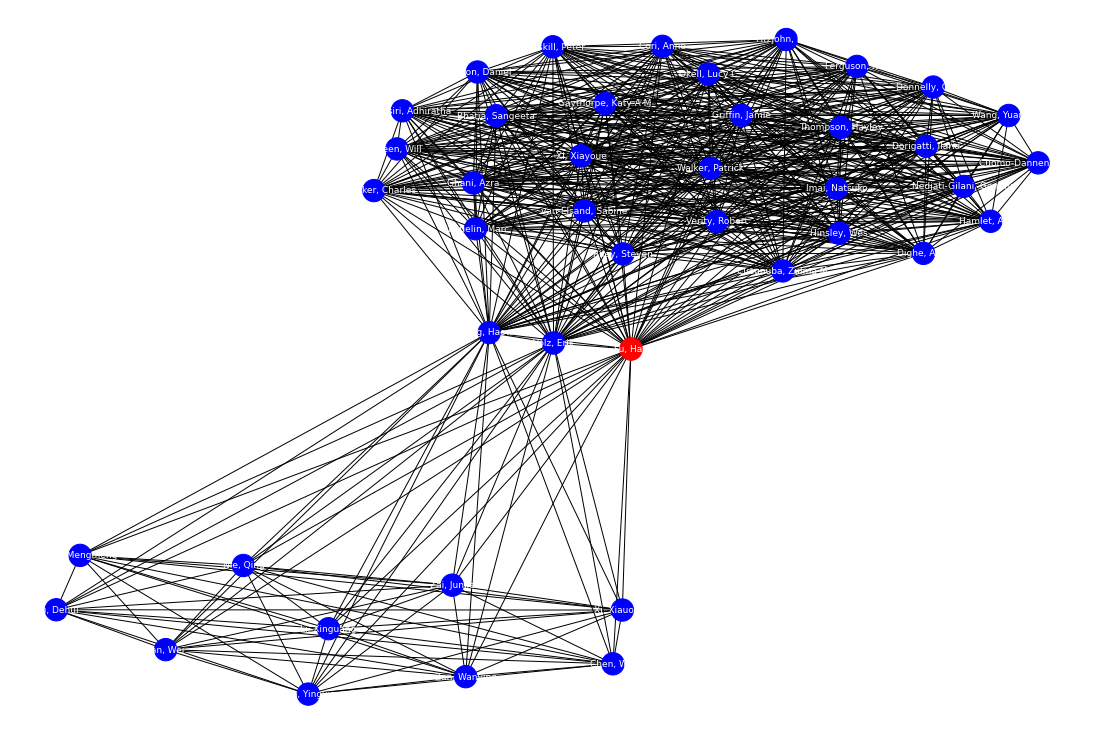

In [ ]:
# pos = hierarchy_pos(G0,1472)    
# nx.draw(G, pos=pos, with_labels=True)
# plt.savefig('hierarchy.png')
def plot_most_important_node_of_graph(G,base,depth):
  # base = 'Fu, Han'
  #look for those within length 3.
  foundset = {key for key in nx.single_source_shortest_path(G,base,cutoff=depth).keys()}
  H=G.subgraph(foundset)
  # nx.draw_networkx(H)
  xdfig=plt.figure(figsize=(15,10))

  color_map = []

  for node in H:
      if node == base:
          color_map.append('red')
      else: 
          color_map.append('blue')    

  nx.draw(H, node_color=color_map, node_size=500, font_size=9, font_color='white', with_labels=True)
  # plt.show()
plot_most_important_node_of_graph(G,'Fu, Han',3)

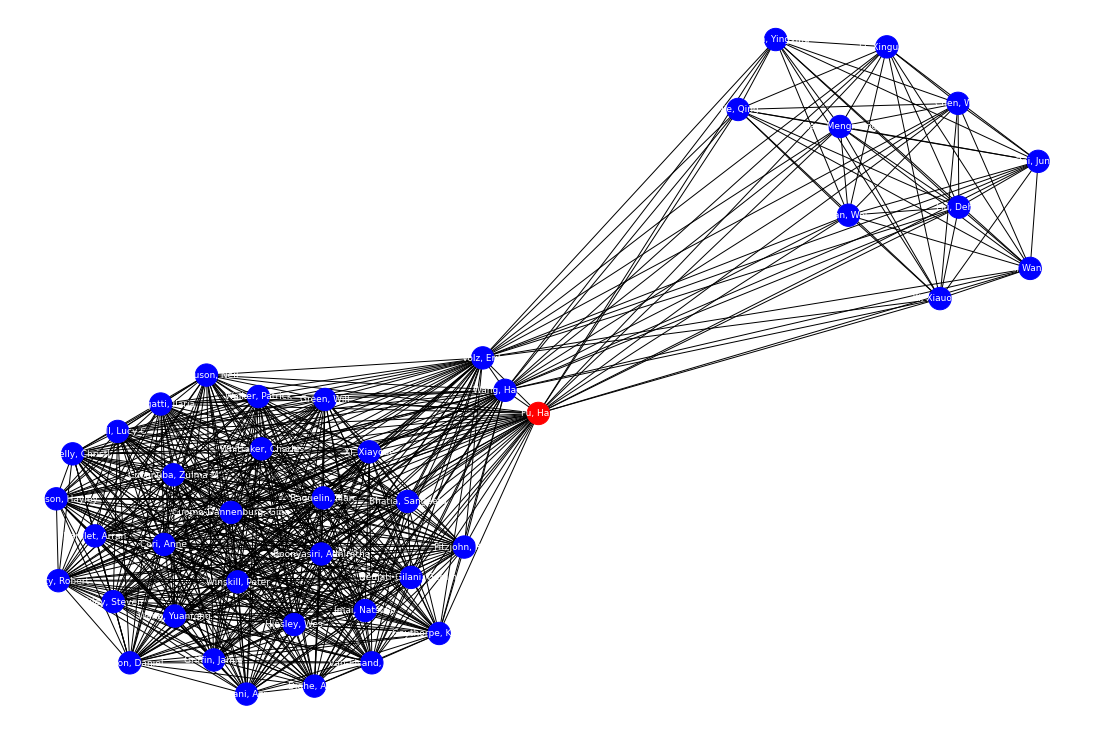

In [ ]:
plot_most_important_node_of_graph(G,'Fu, Han',1)

For the largest component

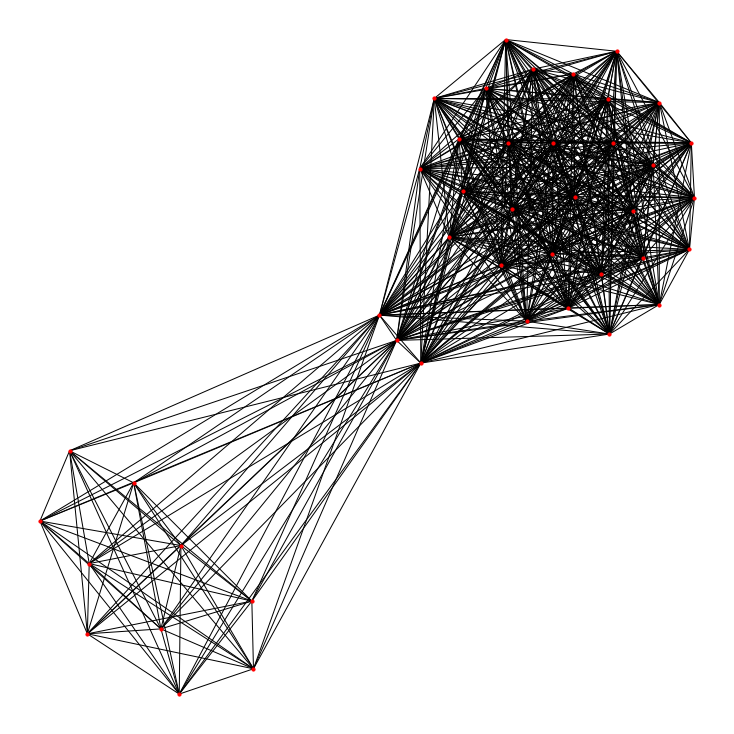

In [ ]:
xdfig=plt.figure(figsize=(10,10))
nx.draw_spring(G0, node_size=10, node_color="red")

In [ ]:
g= NetworkViz(notebook=True)
# g.toggle_hide_edges_on_drag(True)
# g.barnes_hut()
g.from_nx(G0)


In [ ]:
xdfig=plt.figure(figsize=(15,15))
g.show("g.html")

<Figure size 1080x1080 with 0 Axes>

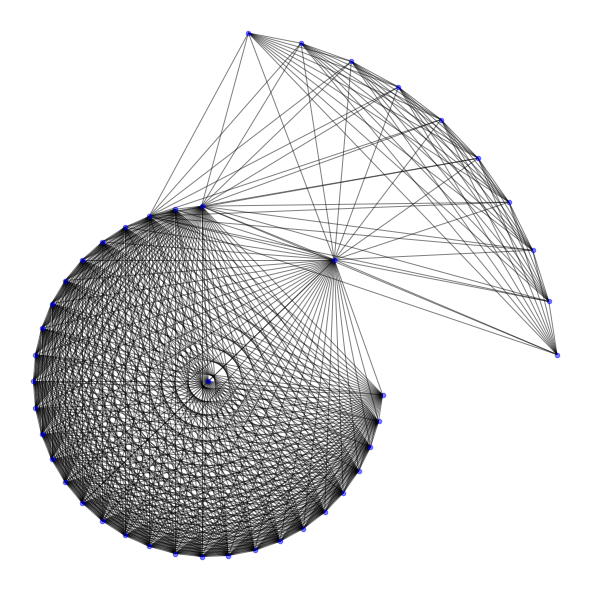

In [ ]:
# G = nx.balanced_tree(3, 5)
pos = graphviz_layout(G0, prog="twopi", args="")
plt.figure(figsize=(8, 8))
nx.draw(G0, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()

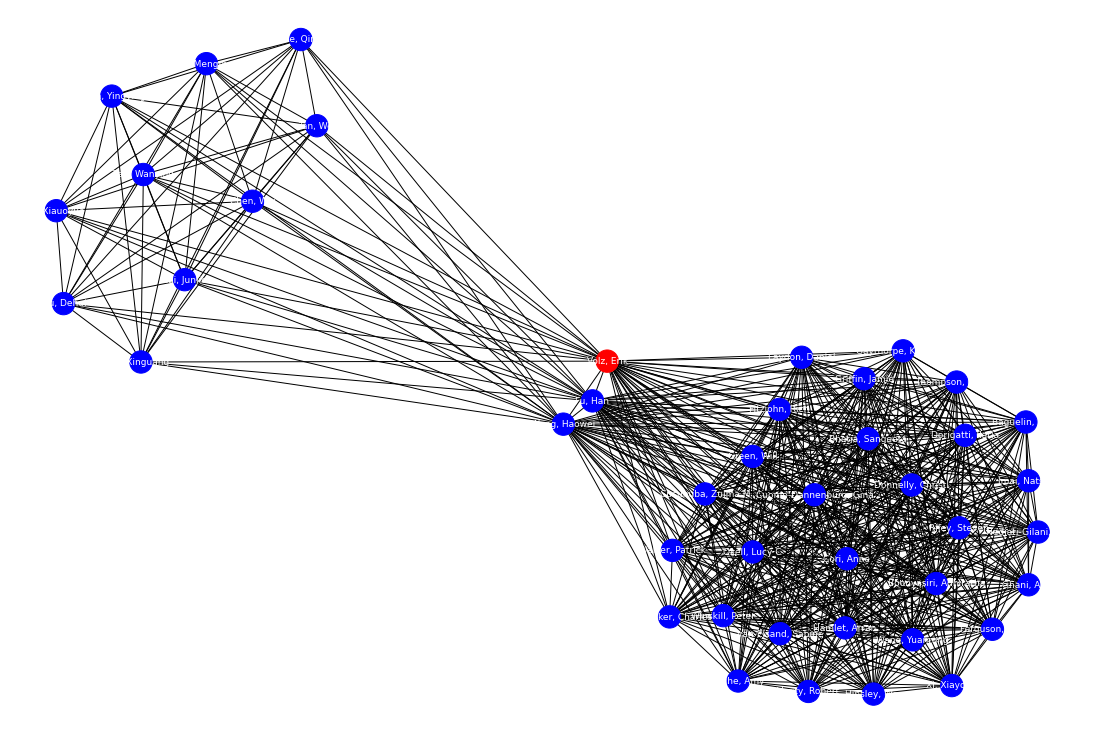

In [ ]:
plot_most_important_node_of_graph(G0,'Volz, Erik',1)

#  **Get the Erdos number**
As an interesting feature we implemented a way in which you can find easily the Erdos number of the most important authors from our collaborations network.

In [ ]:
!pip install distance

In [ ]:
import requests
from bs4 import BeautifulSoup
from typing import Optional
import distance

# using collaboration distance free tool from American Mathematical Society (https://mathscinet.ams.org/mathscinet/freeTools.html?version=2)

# NOT FOUND -> returns none
# FOUND 1 -> returns erdos number
# FOUND MORE -> returns erdos number for best name match
def get_erdos_number(author: str, author_id: Optional[int] = None, depth=0) -> Optional[int]:
    response = requests.get('https://mathscinet.ams.org/mathscinet/collaborationFiltered.html', 
                            params={'AuthorSourceName': author, 
                                    'AuthorTargetName': 'Erdős, Paul', 
                                    'group_target': 189017,
                                    'group_source' : author_id})
    soup = BeautifulSoup(response.text.strip(), 'html.parser')

    if is_not_found(soup):
        return
    
    if is_one_result(soup):
        return number_from_html(soup)

    if is_found_more(soup):
        if depth > 1:
            return
        return get_erdos_number(author=author, author_id=choose_best_match(soup, author=author), depth=depth+1)
    
    return


def is_not_found(html: BeautifulSoup) -> bool:
    errors = html.find_all('div', {'class': 'error'})
    for error in errors:
        if 'no authors matched' in error.__repr__().lower():
            return True
    return False

def is_one_result(html: BeautifulSoup) -> bool:
    numbers = html.find_all('span', {'class': 'erdosNumber'})
    return len(numbers) == 1

def number_from_html(html: BeautifulSoup) -> int:
    text = html.find_all('span', {'class': 'erdosNumber'})[0].text
    text = [c for c in text if c.isdigit()]
    return int(''.join(text))

def is_found_more(html: BeautifulSoup) -> bool:
    errors = html.find_all('div', {'class': 'error'})
    for error in errors:
        if 'we found more than one author that matched' in error.__repr__().lower():
            return True
    return False

# returns the author id for the chosen author
def choose_best_match(html: BeautifulSoup, author: str) -> int:
    options = html.find_all('option')

    # if there's a perfect match return id
    for option in options: 
        if option.text == author:
            return option['value']

    # else choose the name with the lowest distance to the given name
    best_option = None
    min_distance = 1e10
    for option in options:
        d = distance.levenshtein(option.text, author)
        if d < min_distance:
            min_distance = d
            best_option = option
    return best_option['value']


# print(get_erdos_number('Fu, Han'))
# print(get_erdos_number('Wang, Haowei'))

In [ ]:
authors=['Volz, Erik','Wang, Haowei', 'Fu, Han','Walker, Patrick', 'Cucunuba, Zulma M']

for author in authors:
  print(f"For {author}, Erdosi number = {get_erdos_number(author)}")

For Volz, Erik, Erdosi number = 4
For Wang, Haowei, Erdosi number = None
For Fu, Han, Erdosi number = 5
For Walker, Patrick, Erdosi number = 5
For Cucunuba, Zulma M, Erdosi number = None


# **Determine communities**


## **Girvan-Newman Algorithm for Community Detection**



In [ ]:
!pip install cdlib

In [ ]:
!pip install communities

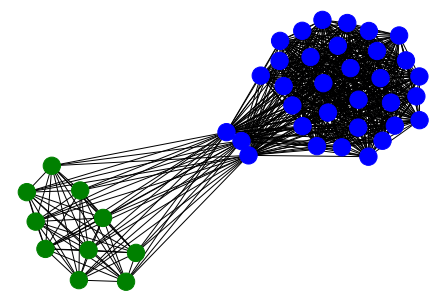

In [ ]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

# find communities in the graph
c = girvan_newman(G0.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))


# plot the communities
color_map = []
for node in G0:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G0, node_color=color_map)
plt.show()

##Louvain Detection Algorithm

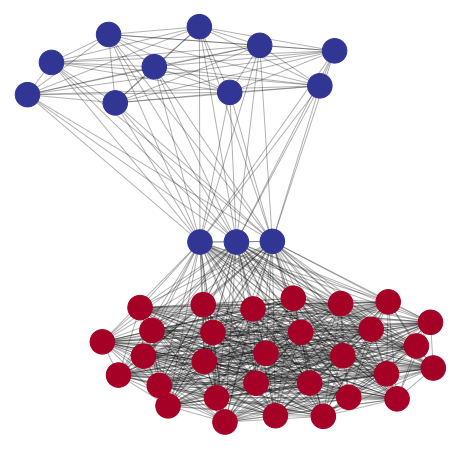

In [ ]:
import networkx as nx
import community
import matplotlib.pyplot as plt


partition = community.best_partition(G0)  # compute communities

pos = nx.spring_layout(G0)  # compute graph layout
plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G0, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G0, pos, alpha=0.3)
plt.show(G)

# Node removal


In [ ]:
G1 = G0.copy(as_view=False)

   #  These are the three most important nodes 
   #    that link the two existent communities 
   #    ['Fu, Han', 'Volz, Erik', 'Wang, Haowei']

rm_nodes = ['Fu, Han', 'Wang, Haowei', 'Volz, Erik'] # nodes to be removed

# G1.remove_node('Fu, Han')
G1.remove_nodes_from(rm_nodes)

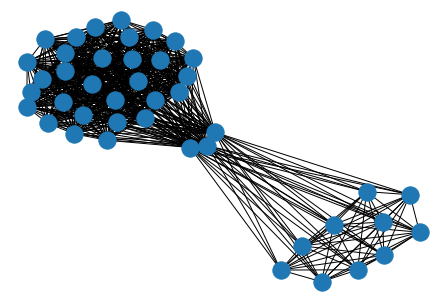

In [ ]:
nx.draw(G0)

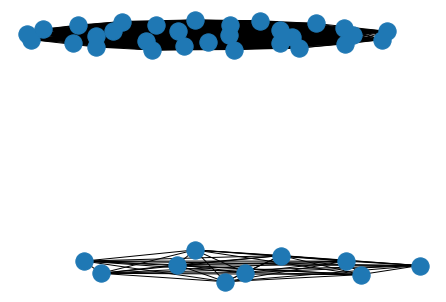

In [ ]:
nx.draw(G1)

In [ ]:
avg_cc1=nx.average_clustering(G1)
print("Avg clustering coefficient:", avg_cc1)

Avg clustering coefficient: 1.0


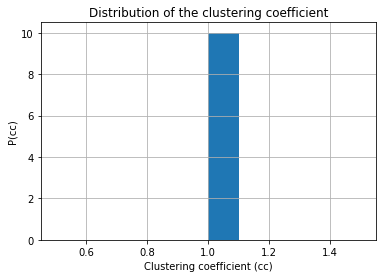

In [ ]:
compute_clustering_cleff(G1)

In [ ]:
nx.degree_histogram(G1)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30]

In [ ]:
degree_centrality1=nx.degree_centrality(G1)
sorted(degree_centrality1.items(),key=lambda x:x[1],reverse=True)[0:10]

[('Cuomo-Dannenburg, Gina', 0.7435897435897436),
 ('Cori, Anne', 0.7435897435897436),
 ('Verity, Robert', 0.7435897435897436),
 ('Donnelly, Christl', 0.7435897435897436),
 ('Green, Will', 0.7435897435897436),
 ('Winskill, Peter', 0.7435897435897436),
 ('Wang, Yuanrong', 0.7435897435897436),
 ('Riley, Steven', 0.7435897435897436),
 ('Cucunuba, Zulma M', 0.7435897435897436),
 ('Dorigatti, Ilaria', 0.7435897435897436)]

In [ ]:
betweenness_centrality1=nx.betweenness_centrality(G1)
sorted(betweenness_centrality1.items(),key=lambda x:x[1],reverse=True)[0:10]

[('Cuomo-Dannenburg, Gina', 0.0),
 ('Zan, Wanying', 0.0),
 ('Cori, Anne', 0.0),
 ('Verity, Robert', 0.0),
 ('Donnelly, Christl', 0.0),
 ('Green, Will', 0.0),
 ('Chen, Wei', 0.0),
 ('Tan, Wei', 0.0),
 ('Zai, Junjie', 0.0),
 ('Winskill, Peter', 0.0)]

In [ ]:
closeness_centrality1=nx.closeness_centrality(G1)
sorted(closeness_centrality1.items(),key=lambda x:x[1],reverse=True)[0:10]

[('Cuomo-Dannenburg, Gina', 0.7435897435897436),
 ('Cori, Anne', 0.7435897435897436),
 ('Verity, Robert', 0.7435897435897436),
 ('Donnelly, Christl', 0.7435897435897436),
 ('Green, Will', 0.7435897435897436),
 ('Winskill, Peter', 0.7435897435897436),
 ('Wang, Yuanrong', 0.7435897435897436),
 ('Riley, Steven', 0.7435897435897436),
 ('Cucunuba, Zulma M', 0.7435897435897436),
 ('Dorigatti, Ilaria', 0.7435897435897436)]

In [ ]:
nx.eigenvector_centrality1=nx.eigenvector_centrality(G1)
sorted(nx.eigenvector_centrality1.items(),key=lambda x:x[1],reverse=True)[0:10]

[('Cuomo-Dannenburg, Gina', 0.18257418583408572),
 ('Cori, Anne', 0.18257418583408572),
 ('Verity, Robert', 0.18257418583408572),
 ('Donnelly, Christl', 0.18257418583408572),
 ('Green, Will', 0.18257418583408572),
 ('Winskill, Peter', 0.18257418583408572),
 ('Wang, Yuanrong', 0.18257418583408572),
 ('Riley, Steven', 0.18257418583408572),
 ('Cucunuba, Zulma M', 0.18257418583408572),
 ('Dorigatti, Ilaria', 0.18257418583408572)]